In [1]:
import os
import numpy as np

from PIL import Image

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Declare variables
NEEDLE = 'needle.png'
GAUGE = 'gauge.png'

## Synthetic Images - Correct Needle placement
* Determine what angle the needle needs to be set to in order to display at the 0 gauge number.
* Deter what angle the needle needs to be set to in order to display the 15 gauge reading.
* Iterate over the range between the 0 angle and the 15 angle
* Create the image with the labels in PSI instead of degrees.

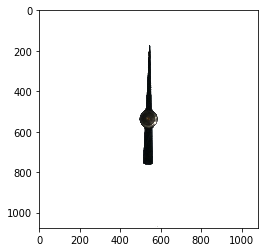

In [4]:
# Modify the image to set the needle at 0 degrees
image = Image.open(NEEDLE).convert('RGBA')
image_rot_90 = image.rotate(232, expand=False, resample=Image.BICUBIC)
image_rot_90.save('needle_rot_0.png')
plt.imshow(image_rot_90)

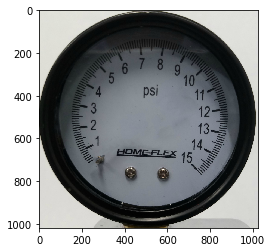

In [5]:
# Gauge background
image = Image.open(GAUGE).convert('RGBA')
plt.imshow(image)

### Needle image manipulation and rotation

In [6]:
# Rotate all the images of needles 360 degrees
def make_needles(angle):
    img = Image.open('needle_rot_0.png')
    x = img.rotate(-angle, expand=True, resample=Image.BICUBIC)
    # crop the rotated image to the size of the original image
    x = x.crop(box=(x.size[0]/2 - img.size[0]/2,
               x.size[1]/2 - img.size[1]/2,
               x.size[0]/2 + img.size[0]/2,
               x.size[1]/2 + img.size[1]/2))
    
    filename = "./needles/needle_rot_{0}.png".format(angle)

    x.save(filename)

for angle in range(0, 360):
    make_needles(angle)

### Individual folder structure for Tensorflow training

In [8]:
# Create the folders for each of the gauge classes

PATH = './synthetic_gauge/psi_{0}'

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

m = range(0, 16)
n = range(1, 10)
o = range(5, 10)

for idx, i in enumerate(m):
    createFolder(PATH.format(i))

    # loop through 0.5 - 1
    for kdx, k in enumerate(o):
        pre_one = "{0}-{1}".format(i,k)
        createFolder(PATH.format(pre_one))
        
    # loop through 1 - 15
    if(i >= 1 and i< 15):

        # Loop through #.1 = #.9
        for jdx, j in enumerate(n):
            decimal = "{0}-{1}".format(i,j)
            createFolder(PATH.format(decimal))